<h3>  &nbsp;&nbsp;Train on GPU&nbsp;&nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a></h3>

1. On the main menu, click Runtime and select **Change runtime type**. Set "GPU" as the hardware accelerator.
1. Click Runtime again and select **Runtime > Run All**. You can also run the cells manually with Shift-ENTER. 

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("Download done!")

Download done!


[9]


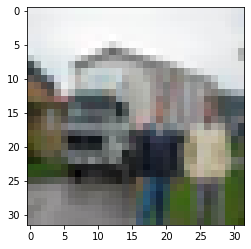

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
picture_id = 16
digit = train_images[picture_id]
plt.imshow(digit, cmap=plt.cm.binary)
print(train_labels[picture_id])
plt.show()

In [4]:
# MODIFY THE CODE TO ADD A VALIDATION SET
valid_size = 2000
(validation_images, train_images) = train_images[:valid_size], train_images[valid_size:]
(validation_labels, train_labels) = train_labels[:valid_size], train_labels[valid_size:]
train_images = train_images.reshape((50000-valid_size, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
validation_labels = to_categorical(validation_labels)

In [ ]:
def count_up(curr_labels):
    tmp = curr_labels.transpose()
    summary = []
    for i in range(10):
        summary.append(tmp[i].sum())
        
    return summary

In [5]:
  # MAKE WHATEVER CHANGES ARE NECESSARY
  # TO GET 0.7 ACCURACY ON THE TEST SET
  
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.25))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4719104   
__________

In [7]:
  # MAKE WHATEVER CHANGES ARE NECESSARY
  # TO GET 0.7 ACCURACY ON THE TEST SET

model_hist = model.fit(train_images, train_labels,
          epochs=25, batch_size=1024, validation_data=(validation_images,validation_labels))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 2000 samples
Epoch 1/25





48000/48000 [==============================] - 77s 2ms/step - loss: 2.1820 - acc: 0.2191 - val_loss: 11.8165 - val_acc: 0.2600
Epoch 2/25
48000/48000 [==============================] - 77s 2ms/step - loss: 1.8362 - acc: 0.3445 - val_loss: 8.8815 - val_acc: 0.4375
Epoch 3/25
48000/48000 [==============================] - 80s 2ms/step - loss: 1.6777 - acc: 0.4036 - val_loss: 9.1644 - val_acc: 0.4185
Epoch 4/25
48000/48000 [==============================] - 80s 2ms/step - loss: 1.5362 - acc: 0.4560 - val_loss: 8.6286 - val_acc: 0.4540
Epoch 5/25
48000/48000 [==============================] - 80s 2ms/step - loss: 1.4233 - acc: 0.4977 - val_loss: 8.5065 - val_acc: 0.4600
Epoch 6/25
48000/48000 [==============================] - 80s 2ms/step - loss: 1.3499 - acc: 0.5250 - val_loss: 8.6474 - val_acc: 0.4505
Epoch 7/25
48000/48000 [==

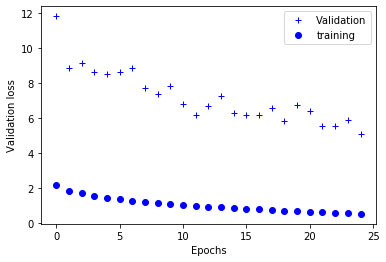

In [8]:
import matplotlib.pyplot as plt

epochs = range(0, 25)
train_loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, train_loss, 'bo', label='training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
test_loss

10000/10000 [==============================] - 14s 1ms/step
test_acc: 0.7255


0.8456183913230896

In [11]:
model.save_weights('./cifar10.h5', overwrite=True)